$\newcommand\reals{\mathbf{R}}$
$\newcommand\cd{\mathcal{D}}$
$\newcommand\ch{\mathcal{H}}$

# 2. Calculating Subgradients

## 2.1
Suppose $f_{1},\ldots,f_{m}:\reals^{d}\to\reals$
are convex functions, and 
\begin{align}
f(x)=\max_{i=1,\ldots,,m}f_{i}(x).
\end{align}
Let $k$ be any index for which $f_{k}(x)=f(x)$, and choose $g\in\partial f_{k}(x)$.
Show that $g\in\partial f(x)$.

#### Proof:
Since $g \in\partial f_k(x)$, we have,

\begin{align}
f_k(x+v) &\geq f_k(x) + g^Tv &&\forall v\in\reals^d
\end{align}

But 
\begin{align}
f(x) &= \max_{i=1,\ldots,,m}f_{i}(x)\\
&\geq f_{i}(x) && \forall i=1,\ldots,,m
\end{align}

Thus $\forall y\in \reals^d$, we have $f(y) \geq f_k(y)$

Now observe that
\begin{align}
f(x+v) &\geq f_k(x+v)\\
&\geq f_k(x) + g^Tv\\
&= f(x) + g^Tv && \text{since $f(x)=f_k(x)$}
\end{align}

Thus $g\in\partial f(x)$.

\newpage

## 2.2
Give a subgradient of $J(w)=\max\left\{ 0,1-yw^{T}x\right\} .$


From 2.1 we have

\begin{align}
\partial J(w) = \begin{cases}
-yx & yw^Tx \leq 1\\
0 & otherwise
\end{cases}
\end{align}

\newpage

# 3. Perceptron

## 3.1
Show that if $\left\{ x\mid w^{T}x=0\right\} $ is a separating hyperplane
for a training set $\cd=\left(\left(x_{1},y_{1}\right),\ldots,(x_{n},y_{n})\right)$,
then the average perceptron loss on $\cd$ is $0$. Thus any separating
hyperplane of $\cd$ is an empirical risk minimizer for perceptron
loss.

#### Proof

Assume $\{x\, \lvert\, w^Tx=0\}$ is a separating hyperplane. Then $y_iw^Tx_i > 0\,\, \forall\,\, i \in \{1, \ldots, n\}$.

Now observe that

\begin{align}
\text{Average perceptron loss} &= \frac{1}{n} \sum_{i=1}^n max\{0, -\hat{y_i}y_i\}\\
&= \frac{1}{n} \sum_{i=1}^n max\{0, -y_iw^Tx_i\}\\
&= \frac{1}{n} \sum_{i=1}^n 0 && \text{since $y_iw^Tx_i > 0$}\\
&= 0
\end{align}

\newpage

## 3.2
Let $\ch$ be the linear hypothesis space consisting of functions
$x\mapsto w^{T}x$. Consider running stochastic subgradient descent
(SSGD) to minimize the empirical risk with the perceptron loss. We'll
use the version of SSGD in which we cycle through the data points
in each epoch. Show that if we use a fixed step size $1$, we terminate
when our training data are separated, and we make the right choice
of subgradient,  then we are exactly doing the Perceptron algorithm.

By 2.1 we have $ \partial l(\hat{y},y) = \begin{cases}
-yx & yw^Tx < 0\\
0 & otherwise
\end{cases}$

With this choice of subgradient and a step size of 1 we can see that the update step is $w^{(k+1)} = \begin{cases}
w^{(k)} + y_ix_i & y_iw^Tx_i < 0\\
w^{(k)} & otherwise
\end{cases}$.

Note that this is precisely the update step in the perceptron algorithm.

Now for the terminating conditions.

Note that when the training data is separated, we have $y_iw^Tx_i > 0\,\, \forall\,\, i \in \{1, \ldots, n\}$. In the perceptron algorithm this will result in all_correct = True and termination of that algorithm. Thus the terminating conditions are equivalent.

\newpage

## 3.3
Suppose the perceptron algorithm returns $w$. Show that $w$ is a
linear combination of the input points. That is, we can write $w=\sum_{i=1}^{n}\alpha_{i}x_{i}$
for some $\alpha_{1},\ldots,\alpha_{n}\in\reals$. The $x_{i}$ for
which $\alpha_{i}\neq0$ are called support vectors. Give a characterization
of points that are support vectors and not support vectors.

From 3.2 we have that the update step is $w^{(k+1)} = \begin{cases}
w^{(k)} + y_ix_i & y_iw^Tx_i < 0\\
w^{(k)} & otherwise
\end{cases}$.

Then since $w^{(0)}=0$ and $y_i \in \{-1,1\}$ it follows that can write $w=\sum_{i=1}^{n}\alpha_{i}x_{i}$
for some $\alpha_{1},\ldots,\alpha_{n}\in\reals$.

The support vectors are vectors that were misclassified at some point during the optimization. When this happens, $y_iw^Tx_i < 0$ which results in $w^{(k+1)} = w^{(k)} + y_ix_i$ and so $\alpha_{i}\neq0$.

\newpage

# 4. The Data

## 4.1
Load all the data and randomly split it into 1500 training examples and 500 validation examples.

In [27]:
from load import shuffle_data
from sklearn.model_selection import train_test_split

# I added a return statement to shuffle_data
data = shuffle_data()
train, val = train_test_split(data, train_size=1500, test_size=500)
x_train = [l[:-1] for l in train ]
y_train = [l[-1] for l in train]
x_val = [l[:-1] for l in val ]
y_val = [l[-1] for l in val]

\newpage

# 5. Sparse Representations

## 5.1
Write a function that converts an example (e.g. a list of words) into a sparse bag-of-words
representation.

In [13]:
from collections import Counter

def to_sparse(word_list):
    return Counter(word_list)

\newpage

# 6. Support Vector Machine via Pegasos

## 6.1
Consider the ``stochastic'' SVM objective function,
which is the SVM objective function with a single training point\footnote{Recall that if $i$ is selected uniformly from the set $\left\{ 1,\ldots,m\right\} $,
then this stochastic objective function has the same expected value
as the full SVM objective function.}: $J_{i}(w)=\frac{\lambda}{2}\|w\|^{2}+\max\left\{ 0,1-y_{i}w^{T}x_{i}\right\} $.
The function $J_{i}(\theta)$ is not differentiable everywhere. Give
an expression for the gradient of $J_{i}(w)$ where it's defined,
and specify where it is not defined.

#### Solution
$\nabla J_i(w) = \begin{cases}
\lambda w -y_ix_i & y_iw^Tx_i < 1\\
\lambda w & y_iw^Tx_i > 1\\
undefined & y_iw^Tx_i = 1
\end{cases}$

\newpage

## 6.2 
Show that a subgradient of $J_{i}(w)$ is given by 
\begin{eqnarray*}
g & = & \begin{cases}
\lambda w-y_{i}x_{i} & \mbox{for }y_{i}w^{T}x_{i}<1\\
\lambda w & \mbox{for }y_{i}w^{T}x_{i}\ge1.
\end{cases}
\end{eqnarray*}
You may use the following facts without proof: 1) If $f_{1},\ldots,f_{m}:\reals^{d}\to\reals$
are convex functions and $f=f_{1}+\cdots+f_{m}$, then $\partial f(x)=\partial f_{1}(x)+\cdots+\partial f_{m}(x)$.
2) For $\alpha\ge0$, $\partial\left(\alpha f\right)(x)=\alpha\partial f(x)$.

#### Solution

Let $ f_1(w) = \frac{\lambda}{2} \Vert w\Vert^2$ and $ f_2(w) = max \{0,1-y_iw^Tx_i\}$. Note that $J_i(w) = f_1(w) + f_2(w)$.

Now $\partial f_1(w) = \lambda w$.

From the results of question 2.1 we also have $ \partial f_2(w) = \begin{cases}
-y_{i}x_{i} & \mbox{for }y_{i}w^{T}x_{i}<1\\
0 &\mbox{for }y_{i}w^{T}x_{i}\ge1.
\end{cases}$

Then from fact 1 we can conclude that $g = \begin{cases}
\lambda w-y_{i}x_{i} & \mbox{for }y_{i}w^{T}x_{i}<1\\
\lambda w & \mbox{for }y_{i}w^{T}x_{i}\ge1.
\end{cases}$





\newpage

## 6.3
Show that if your step size rule is $\eta_{t}=1/\left(\lambda t\right)$,
then doing SGD with the subgradient direction from the previous problem
is the same as given in the pseudocode.

#### Solution

Observe that 
\begin{align}
w_{t+1} &= w_t - \eta_t g(w_t) \\
&= \begin{cases}
w_t - \eta_t\lambda w_t+\eta_t y_{i}x_{i} & \mbox{for }y_{i}w_t^{T}x_{i}<1\\
w_t - \eta_t\lambda w_t & \mbox{for }y_{i}w_t^{T}x_{i}\ge1.
\end{cases}\\
&= \begin{cases}
w_t(1 - \eta_t)+\eta_t y_{i}x_{i} & \mbox{for }y_{i}w_t^{T}x_{i}<1\\
w_t(1 - \eta_t) & \mbox{for }y_{i}w_t^{T}x_{i}\ge1.
\end{cases}
\end{align}

This is equivalent to the update step in the Pegasos algorithm.

\newpage

### 6.4
Implement the Pegasos algorithm to run on a sparse data representation.

In [44]:
def sparse_multiply(c, x):
    # multiply values in dictionary x by scaler c
    # we'll use counters to be consistent
    out = Counter()
    for k, v in x.items():
        out[k] = c*v
    return out

In [65]:
from util import dotProduct, increment

def pegasos_svm(x, y, lambda_reg, n_epochs=10):
    t=0
    w = Counter()
    for epoch in range(n_epochs):
        for x_i, y_i in zip(x, y):
            t += 1
            eta = 1/(t*lambda_reg)
            scale = (1 - eta * lambda_reg)
            # Rescale w
            for k, v in w.items():
                w[k] = scale * v              
            # Apply gradient if needed
            if y_i * dotProduct(w, x_i) < 1:
                support_grad = sparse_multiply(eta * y_i, x_i)
                increment(w, 1, support_grad)
    return w

\newpage

## 6.5 

### 6.5.1
Verify that the Pegasos update step is equivalent to:
\begin{eqnarray*}
s_{t+1} & = & \left(1-\eta_{t}\lambda\right)s_{t}\\
W_{t+1} & = & W_{t}+\frac{1}{s_{t+1}}\eta_{t}y_{j}x_{j}.
\end{eqnarray*}

Where $s_{t+1}=\left(1-\eta_{t}\lambda\right)s_{t}$

#### Proof
Observe that

\begin{align}
w_{t+1} &= s_{t+1}W_{t+1} \\
&= s_{t+1} \left( W_t + \frac{1}{s_{t+1}}\eta_t y_j x_j \right) \\
&= s_{t+1}W_t + \eta_t y_j x_j\\
&= (1-\eta_t \lambda)s_tW_t + \eta_t y_j x_j\\
&= (1-\eta_t \lambda)w_t + \eta_t y_j x_j
\end{align}

This is the same as the update step in the Pegasos algorithm.

\newpage

### 6.5.2

Implement the Pegasos algorithm with the $(s,W)$ representation described above.

In [69]:
def pegasos_svm_modified(x, y, lambda_reg, n_epochs=10):
    t = 1
    s = 1
    W = Counter()
    for epoch in range(n_epochs):
        for x_i, y_i in zip(x, y):
            t += 1
            eta = 1/(t*lambda_reg)
            s = (1 - eta * lambda_reg) * s
            if y_i * s * dotProduct(W, x_i) < 1:
                support_grad = sparse_multiply(eta * y_i, x_i)
                increment(W, 1/s, support_grad)
    return sparse_multiply(s,W)

\newpage

## 6.6
Run both implementations of Pegasos on the training data for a couple epochs (using the
bag-of-words feature representation described above). Make sure your implementations are
correct by verifying that the two approaches give essentially the same result. Report on the
time taken to run each approach.

In [31]:
x_train_sparse = [to_sparse(x) for x in x_train]
x_val_sparse = [to_sparse(x) for x in x_val]

In [96]:
from timeit import default_timer as timer

n_epochs = 2
lambda_reg = 1

start = timer()
w1 = pegasos_svm(x_train_sparse, y_train, lambda_reg, n_epochs)
end = timer()
delta_t = end-start
print("Standard algorithm took {} seconds to complete {} epochs".format(delta_t, n_epochs))

start = timer()
w2 = pegasos_svm_modified(x_train_sparse, y_train, lambda_reg, n_epochs)
end = timer()
delta_t = end-start
print("Modified algorithm took {} seconds to complete {} epochs".format(delta_t, n_epochs))

Standard algorithm took 20.150097092962824 seconds to complete 2 epochs
Modified algorithm took 0.5985467850696295 seconds to complete 2 epochs


In [91]:
# Check for similar results
w1_values = list(w1.values())
w2_values = list(w2.values())
print(w1_values[:3])
print(w2_values[:3])

[0.0013333333333333372, -0.012999999999999979, -0.00133333333333333]
[0.001332889036987675, -0.012995668110629811, -0.0013328890369876678]


\newpage

## 6.7
Write a function that takes a sparse weight vector $w$ and a collection
of $(x,y)$ pairs, and returns the percent error when predicting $y$
using $sign(w^{T}x)$. In other words, the function reports the 0-1
loss of the linear predictor $x\mapsto w^{T}x$.

In [100]:
def percent_error(x, y, w):
    n_wrong = 0
    for x_, y_ in zip(x,y):
        y_pred = dotProduct(x_,w)
        if y_pred * y_ < 0:
            n_wrong += 1
    return n_wrong / len(y)

\newpage

## 6.8
Using the bag-of-words feature representation described above, search
for the regularization parameter that gives the minimal percent error
on your test set. (You should now use your faster Pegasos implementation,
and run it to convergence.) A good search strategy is to start with
a set of regularization parameters spanning a broad range of orders
of magnitude. Then, continue to zoom in until you're convinced that
additional search will not significantly improve your test performance.
Once you have a sense of the general range of regularization parameters
that give good results, you do not have to search over orders of magnitude
every time you change something (such as adding a new feature)

In [165]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 10]

In [117]:
lambdas = [1e-5, 1e-3, 1e-2, 1e-1, 1, 5]
errors = []

for l in tqdm(lambdas):
    w = pegasos_svm_modified(x_train_sparse, y_train, l, n_epochs=1000) 
    errors.append(percent_error(x_val_sparse, y_val, w))

100%|██████████| 6/6 [22:46<00:00, 269.07s/it]


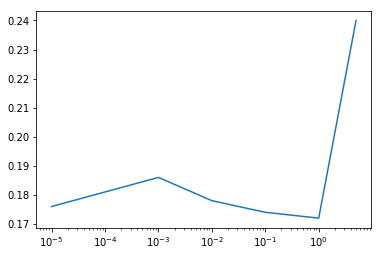

In [118]:
plt.plot(lambdas, errors)
plt.xscale('log')

In [119]:
lambdas = np.linspace(0.1, 2, 10)
errors = []

for l in tqdm(lambdas):
    w = pegasos_svm_modified(x_train_sparse, y_train, l, n_epochs=1000)
    errors.append(percent_error(x_val_sparse, y_val, w))

100%|██████████| 10/10 [1:40:36<00:00, 647.60s/it]


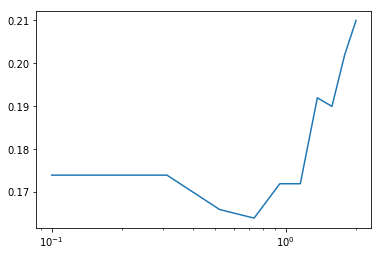

In [121]:
plt.plot(lambdas, errors)
plt.xscale('log')

In [130]:
best_lambda = lambdas[np.argmin(errors)]
w = pegasos_svm_modified(x_train_sparse, y_train, best_lambda, n_epochs=1000)
print("The best value of lambda is {} with a validation error of {}".format(best_lambda, min(errors)))

The best value of lambda is 0.7333333333333333 with a validation error of 0.164


\newpage

## 6.9
Recall that the ``score'' is the value of the prediction
$f(x)=w^{T}x$. We like to think that the magnitude of the score represents
the confidence of the prediction. This is something we can directly
verify or refute. Break the predictions into groups based on the score
(you can play with the size of the groups to get a result you think
is informative). For each group, examine the percentage error. You
can make a table or graph. Summarize the results. Is there a correlation
between higher magnitude scores and accuracy?

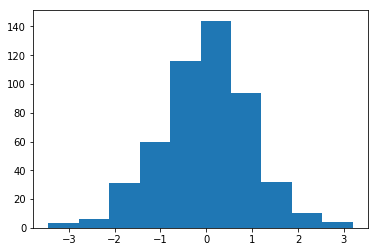

In [134]:
# First lets look at the range of predicted values
ax = plt.hist(y_pred)

In [170]:
from sklearn.metrics import accuracy_score

def standard_error(y, y_pred):
    p = accuracy_score(y, y_pred)
    n = len(y)
    return np.sqrt(p*(1-p)/n)

# Try with splitting into 3 groups
# |y| < 1
# 1 < |y| < 2
# |y| > 2

score = np.array([dotProduct(w, x) for x in x_val_sparse])
score_mag = np.abs(score)

idx_1 = np.argwhere(score_mag < 1)
idx_2 = np.argwhere((score_mag > 1) & (score_mag < 2))
idx_3 = np.argwhere(score_mag > 2)

y_pred_1 = np.sign(score[idx_1])
y_pred_2 = np.sign(score[idx_2])
y_pred_3 = np.sign(score[idx_3])
y_preds = [y_pred_1, y_pred_2, y_pred_3]

y_1 = np.array(y_val)[idx_1]
y_2 = np.array(y_val)[idx_2]
y_3 = np.array(y_val)[idx_3]
y_trues = [y_1, y_2, y_3]

accuracies = [accuracy_score(y_pred, y_true) for y_pred, y_true in zip(y_preds, y_trues)]
errors = [standard_error(y_pred, y_true) for y_pred, y_true in zip(y_preds, y_trues)]

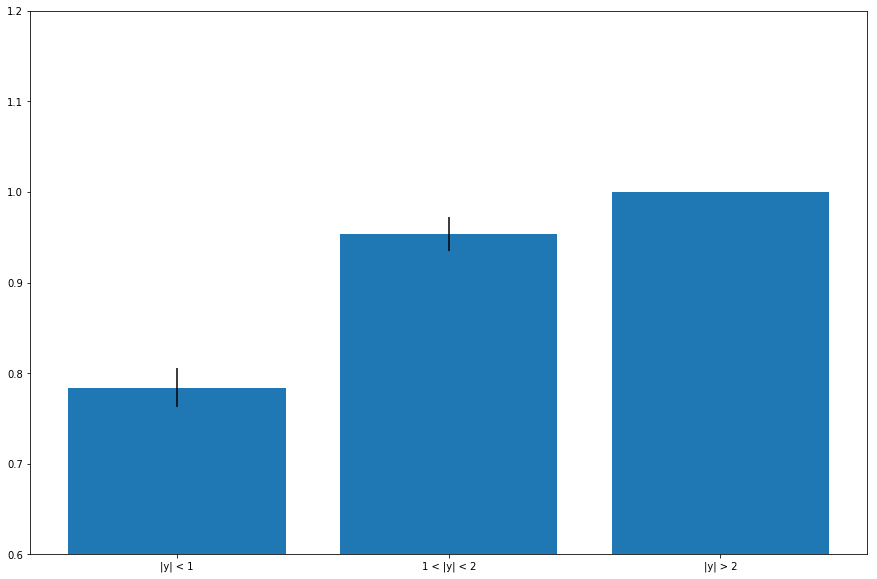

In [172]:
ax = plt.bar(["|y| < 1", "1 < |y| < 2", "|y| > 2"], accuracies, yerr=errors)
_ = plt.ylim(0.6,1.2)

There appears to be some correlation between the score magnitude and the accurace of the predictions.

\newpage

## 6.10
### TODO

\newpage

# 8 Features

## 8.1
Investigate the feature importances of two misclasified points.

In [201]:
import pandas as pd

def get_feature_importances(x, w):
    # Get the feature weights of features in x soreted by magnitude
    features = [(word, count*w[word]) for word, count in x.items()]
    sorted_features = sorted(features, key=lambda x: np.abs(x[1]), reverse=True)
    return pd.DataFrame(sorted_features)

In [190]:
y_pred = np.sign(score)
incorrect_examples = np.array(x_val_sparse)[y_val != y_pred]
incorrect_examples_raw = np.array(x_val)[y_val != y_pred]
y_true_incorrect = np.array(y_val)[y_val != y_pred]

#### First example

In [202]:
feature_importances_1 = get_feature_importances(incorrect_examples[0], w)
print("True label was {}".format(y_true_incorrect[0]))
feature_importances_1[:10]

True label was -1


,0,1
0,and,0.329479
1,to,-0.246941
2,is,0.198787
3,be,-0.167227
4,very,0.160676
5,with,0.142685
6,many,0.121658
7,even,-0.106560
8,the,0.101324
9,on,-0.093114


In [197]:
print(' '.join(incorrect_examples_raw[0]))

in 1970s many european intellectuals especially those on the left political hemisphere became obsessed with the rise of fascism which wasn't so hard to expect because the social turmoil of 1960s and economic decline of 1970s seemed to be the breeding ground for many dangerous ideologies in such times when political involvement could be associated with noble passion many filmmakers tried to warn the present generations of dangers that lurk ahead by giving the look of prewar europe and circumstances that led to phenomena like fascist italy and nazi germany of course there were authors who jumped on the bandwagon for other less noble reasons for them moral depravity of fascism could be explained to the audience by explicitly showing sexual depravity of those era which naturally made some of those films very popular among teen audience one of such filmmakers was italian director tinto brass who later made career shooting expensive stylish soft porn salon kitty his 1976 film is very losely 

#### Analysis

The true label here is -1 which means the model predicted this as a positive review. Looking at the feature importance we see that many words that we would consider neutral contributed greatly to the positive clasification. These words include "and", "is", and "the". A possible explanation is that, by chance, these words have a small positive weight in the weight vector. However, since they are so common, their effects accumulate and eventually dominate the classification especially in longer reviews such as this one. In fact, let's look at the weight of some of these words in the weight vector.

In [207]:
print(w['as'])
print(w['is'])
print(w['the'])
print(w['bad'])

0.015632716850917223
0.02839816288607632
0.003166361525456027
-0.1164499223667763


As we can see, these words have much smaller weights especially when compared to a more strongly polarized word such as "bad". Removal of these common words ("stopwords") could helpin improving the model.

Another thing to note is the strong positive contribution by the word "very". It is probably true that, in general, the word "very" is used in a positive manner. However in this review at one point it is preceded by a "not". Introducing bigrams may give the model some more context into how the words were used and increase performance.

\newpage

#### Second example

In [222]:
feature_importances_2 = get_feature_importances(incorrect_examples[15], w)
print("True label was {}".format(y_true_incorrect[15]))
feature_importances_2[:15]

True label was -1


,0,1
0,and,0.278790
1,is,0.198787
2,be,-0.133782
3,with,0.118904
4,on,-0.093114
5,this,-0.092986
6,from,0.086779
7,to,-0.082314
8,or,-0.071262
9,a,0.065479


In [220]:
print(' '.join(incorrect_examples_raw[15]))

silly performances and some huge gaps in logic mar an otherwise interesting tale of an eclectic group of people stranded at the last stop cafe and motel due to heavy snowfall one of the stranded is a colorado state highway patrolman adam beach who discovers a murder scene and a bag full of cash from a recent bank robbery someone amongst the group of strangers is a bank robber and a murderer but is it the same person or are there multiple criminals ? adam beach unfortunately was the wrong choice for the lead in this film he doesn't play the role with enough seriousness to be believable or enough goofiness for it to be funny his performance is stuck somewhere in the middle and this film really needed it to be on one side or the other rose mcgowan is cold and unpleasant to the eye as always and jurgen prochnow what on earth is he doing in this ? best performance comes from william s taylor as a cheesy yet still somehow cool and confident wayne newton drifter type the last stop is availabl

#### Analysis
Again we see strong contributions by common, neutral words such as "and", "is", and "with". One thing I noticed is that many of these incorrectly classified examples are very long. It appears that the model has a hard time classifying long reviews due to the large number of these common words. The prediction is dominated by whatever direction these words just happen to point. Again, removal of stopwords could help here.